### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
import random

In [3]:
df = pd.read_csv("Dry Bean Dataset.csv")

In [4]:
x = df.drop('Class', axis=1)
y = df['Class']

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
results = []
all_convergences = []
for sample_id in tqdm(range(10), desc="Samples"):
    x_train, x_test, y_train, y_test = train_test_split(
        x_scaled, y, test_size=0.3, stratify=y, random_state=sample_id)

    best_acc = 0
    best_params = {}
    acc_list = []

    cumulative_best = []

    for i in range(100):
        kernel = random.choice(['linear', 'poly', 'rbf', 'sigmoid'])
        C = random.choice([0.1, 1, 10, 100])
        gamma = random.choice(['scale', 0.01, 0.1, 1])
        degree = random.choice([2, 3, 4]) if kernel == 'poly' else 3

        model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)

        if acc > best_acc:
            best_acc = acc
            best_params = {
                'kernel': kernel,
                'C': C,
                'gamma': gamma,
                'degree': degree
            }

        cumulative_best.append(best_acc)

    all_convergences.append((sample_id, cumulative_best))
    results.append({
        'Sample': f"S{sample_id + 1}",
        'Best Accuracy': best_acc,
        'Kernel': best_params['kernel'],
        'C': best_params['C'],
        'Gamma': best_params['gamma'],
        'Degree': best_params['degree']
    })


Samples: 100%|██████████| 10/10 [3:44:02<00:00, 1344.26s/it] 


In [10]:
df_results = pd.DataFrame(results)
print("\nFinal Results Table:")
print(df_results)


Final Results Table:
  Sample  Best Accuracy Kernel    C  Gamma  Degree
0     S1       0.934133    rbf  100   0.01       3
1     S2       0.934378    rbf   10    0.1       3
2     S3       0.937071    rbf   10  scale       3
3     S4       0.929726    rbf  100  scale       3
4     S5       0.931195    rbf  100   0.01       3
5     S6       0.941234    rbf  100   0.01       3
6     S7       0.932174    rbf   10    0.1       3
7     S8       0.933154    rbf  100  scale       3
8     S9       0.931929    rbf  100   0.01       3
9    S10       0.931440    rbf   10    0.1       3


In [11]:
best_sample_id = df_results['Best Accuracy'].idxmax()
best_sample_conv = all_convergences[best_sample_id][1]

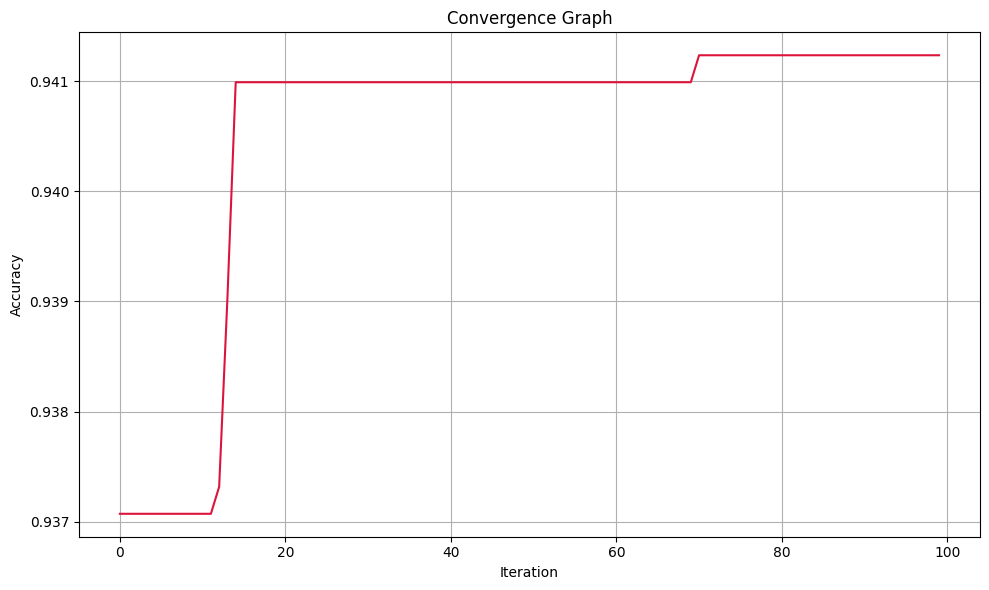

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(100), best_sample_conv, linestyle='-', color='crimson')
plt.title("Convergence Graph")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()